In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_darah_2015_2025_edited.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['State'] = df['State'].astype('category').cat.codes


C:\Users\USER\AppData\Local\Temp\ipykernel_15796\843256154.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [3]:
# Define features
features = [
    'State', 'Month', 'Day', 'Weekday',
    'Location_centre', 'Location_mobile',
    'Type_wholeblood', 'Type_apheresis_platelet', 'Type_apheresis_plasma', 'Type_other',
    'Social_civilian', 'Social_student', 'Social_policearmy',
    'Donations_new', 'Donations_regular', 'Donations_irregular'
]
X = df[features]
y_a = df['Blood_a']
y_b = df['Blood_b']
y_o = df['Blood_o']
y_ab = df['Blood_ab']


🔍 Training model for Blood Type a...
✅ Blood a - MSE: 16.71, R² Score: 0.9837
💾 Model saved as model_blood_a.pkl


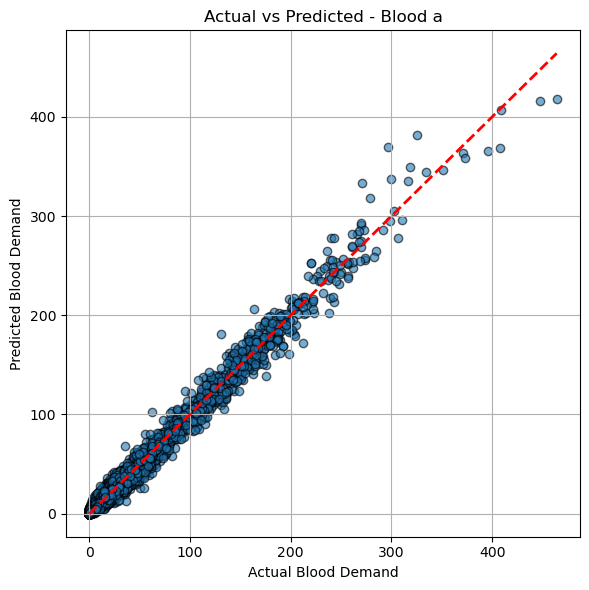


🔍 Training model for Blood Type B...
✅ Blood B - MSE: 19.34, R² Score: 0.9838
💾 Model saved as model_blood_b.pkl


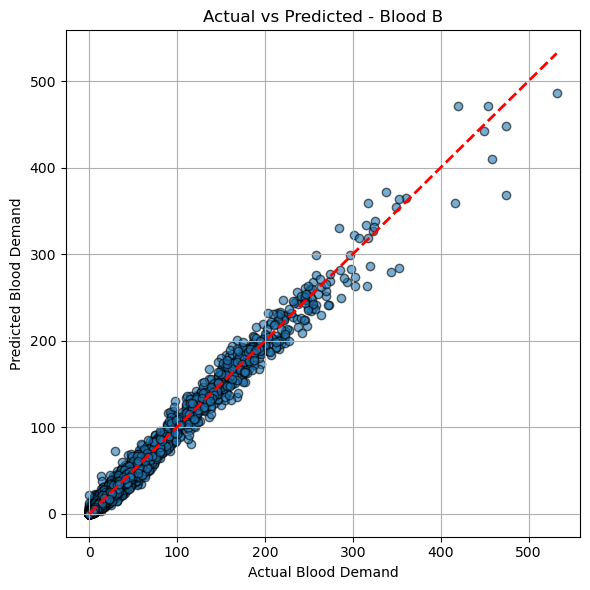


🔍 Training model for Blood Type o...
✅ Blood o - MSE: 24.48, R² Score: 0.9916
💾 Model saved as model_blood_o.pkl


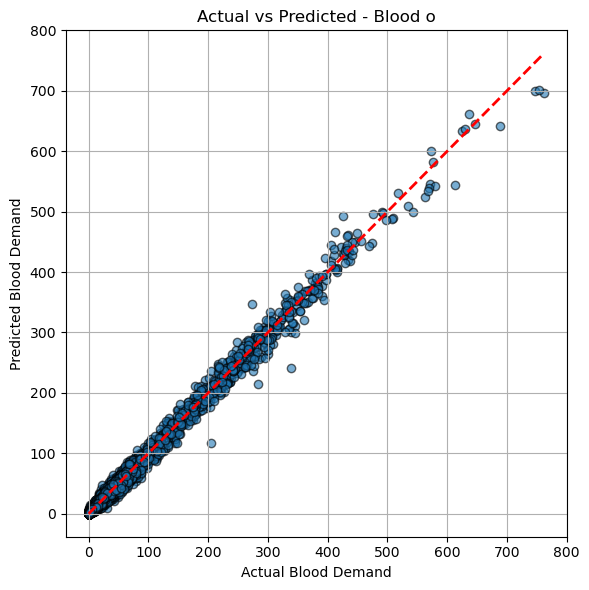


🔍 Training model for Blood Type ab...
✅ Blood ab - MSE: 7.47, R² Score: 0.8699
💾 Model saved as model_blood_ab.pkl


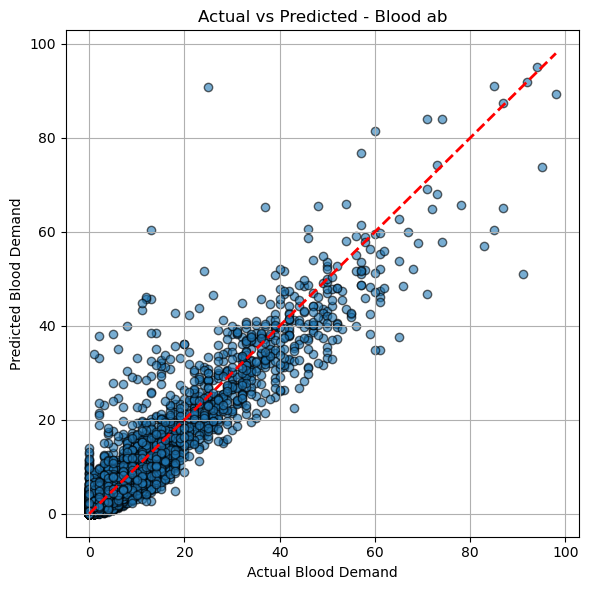

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib

def train_and_save_model(X, y, label):
    print(f"\n🔍 Training model for Blood Type {label}...")

    # 1. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 3. Make predictions
    y_pred = model.predict(X_test)

    # 4. Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"✅ Blood {label} - MSE: {mse:.2f}, R² Score: {r2:.4f}")

    # 5. Save the model
    joblib.dump(model, f"model_blood_{label.lower()}.pkl")
    print(f"💾 Model saved as model_blood_{label.lower()}.pkl")

    # 6. Plot actual vs predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Actual Blood Demand")
    plt.ylabel("Predicted Blood Demand")
    plt.title(f"Actual vs Predicted - Blood {label}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Train and evaluate all blood types
train_and_save_model(X, y_a, 'a')
train_and_save_model(X, y_b, 'B')
train_and_save_model(X, y_o, 'o')
train_and_save_model(X, y_ab, 'ab')
